In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import math

In [2]:
print(tf.__version__)
print(keras.__version__)

2.3.1
2.4.0


In [3]:
# dataset using keras api
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
# check dataset
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


5


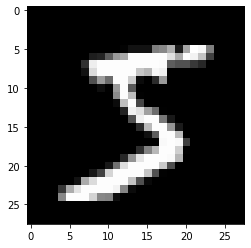

In [5]:
# let's visualize first training image
plt.imshow(x_train[0] ,cmap = 'gray')
print(y_train[0])

In [6]:
# some simple statistics about dataset
print(np.amax(x_train[0]),np.amin(x_train[0]))

print(np.amax(y_train),np.amin(y_train))

print(np.amax(x_test[0]),np.amin(x_test[0]))

print(np.amax(y_test),np.amin(y_test))

255 0
9 0
255 0
9 0


Network

In [7]:
# first layer for Keras functional api
img_input = keras.Input(shape=(28, 28, 1), name="img")

In [8]:
print(img_input.shape)
print(img_input.dtype)

(None, 28, 28, 1)
<dtype: 'float32'>


In [9]:
# rest of the model using pre-defined layers from Keras api

from keras.layers import Conv2D, BatchNormalization, Dropout, Input, Dense, Flatten

l1 = Conv2D(filters  = 100,
            kernel_size = (5,5),
            strides = (1,1),
            padding = 'same',
            activation = 'relu',
            use_bias = True,
            kernel_initializer = 'glorot_uniform')(img_input)

l2 = Conv2D(filters  = 25,
            kernel_size = (5,5),
            strides = (1,1),
            padding = 'same',
            activation = 'relu',
            use_bias = True,
            kernel_initializer = 'glorot_uniform')(l1)

l2_flat = Flatten()(l2)

prediction = Dense(10,activation = 'softmax')(l2_flat)

In [10]:
from keras.models import Model
from keras.optimizers import Adam

In [11]:
# define model and optimizer.
inzvaNet = Model(inputs=img_input, outputs=prediction)

# our optimizer
opt = Adam(lr = 0.001)

# we compile to start the weights etc.
# sparse categorical to automatically one-hot encode!
# point out that in previous it was logits
inzvaNet.compile(optimizer=opt,
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [12]:
# final check of model before training
inzvaNet.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 100)       2600      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 25)        62525     
_________________________________________________________________
flatten (Flatten)            (None, 19600)             0         
_________________________________________________________________
dense (Dense)                (None, 10)                196010    
Total params: 261,135
Trainable params: 261,135
Non-trainable params: 0
_________________________________________________________________


In [13]:
# training
history = inzvaNet.fit(x_train, y_train, batch_size=128, epochs=3, validation_split=0.1)

Epoch 1/3
422/422 [==============================] - 112s 265ms/step - loss: 0.3531 - accuracy: 0.9225 - val_loss: 0.0982 - val_accuracy: 0.9745
Epoch 2/3
422/422 [==============================] - 125s 296ms/step - loss: 0.0804 - accuracy: 0.9750 - val_loss: 0.0832 - val_accuracy: 0.9758
Epoch 3/3
422/422 [==============================] - 120s 285ms/step - loss: 0.0552 - accuracy: 0.9820 - val_loss: 0.0672 - val_accuracy: 0.9813


In [14]:
# test model on test data
test_scores = inzvaNet.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

313/313 - 3s - loss: 0.0707 - accuracy: 0.9789
Test loss: 0.07065042108297348
Test accuracy: 0.9789000153541565
